In [2]:
import numpy as np

In [3]:
# Data before and after the maintenance increase
before = [6, 18, 5, 4, 16, 13, 20, 9, 3]
after = [5, 16, 7, 4, 18, 12, 14, 7, 1]

# Compute the differences
differences = np.array(before) - np.array(after)

# Number of positive differences (defects decreased)
n_positive = sum(differences > 0)
# Number of negative differences (defects increased)
n_negative = sum(differences < 0)
# Number of zero differences (no change)
n_zero = sum(differences == 0)

n_positive, n_negative, n_zero

(6, 2, 1)

Count the number of positive and negative signs. Positive signs = 6, Negative signs = 2. The sample size is then  6+2=8
 .
Note that this is a right-tailed test, since we are looking at “reducing” defective parts so that  Before>After

The test statistic is the number of plus signs,  x=6
 .

In [4]:
from scipy.stats import binom

# Total number of non-zero differences
n = n_positive + n_negative

# Critical value for alpha = 0.05, one-tailed test
alpha = 0.05
critical_value = binom.ppf(1 - alpha, n, 0.5)
critical_value


6.0

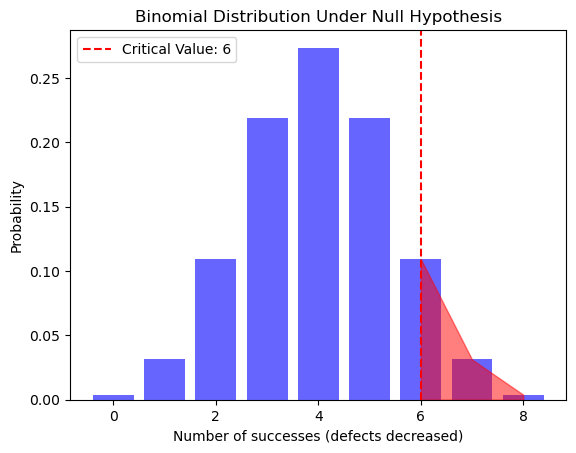

In [6]:
import matplotlib.pyplot as plt

# Binomial distribution
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, 0.5)

plt.bar(x, pmf, color='blue', alpha=0.6)
plt.axvline(critical_value, color='red', linestyle='dashed', label=f'Critical Value: {critical_value:.0f}')
plt.fill_between(x, 0, pmf, where=(x >= critical_value), color='red', alpha=0.5)
plt.xlabel('Number of successes (defects decreased)')
plt.ylabel('Probability')
plt.title('Binomial Distribution Under Null Hypothesis')
plt.legend()
plt.show()

In [7]:
# Compute p-value
p_value = 1 - binom.cdf(n_positive - 1, n, 0.5)
p_value

0.14453125

The p-value = 0.1445, which is greater than  α=0.05
 ; therefore do not reject  H0
 .

There is not enough evidence to support the claim that the additional maintenance reduces the number of defective parts manufactured by the machines.